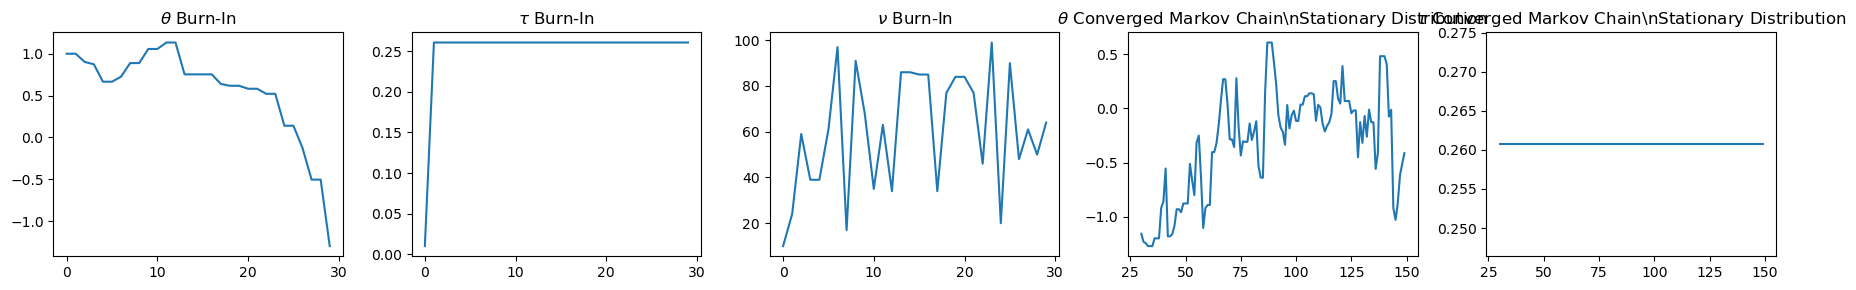

In [21]:
###Q1:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def MH_Gibbs_sampler_t_log(x, G):
    theta = np.zeros(G)
    tau = np.zeros(G)
    nu = np.zeros(G, dtype=int)  
    theta[0] = 1
    tau[0] = 1/100
    nu[0] = 10 
    np.random.seed(1234)
    
    nu_values = np.arange(1, 101)

    EPSILON = 1e-10  

    for i in range(1, G):
        # for tau:
        def log_tau_target(tau_):
            return np.sum(stats.t.logpdf(x, df=nu[i-1], loc=theta[i-1], scale=(1/tau_)**0.5)) + stats.halfnorm.logpdf(1/np.sqrt(tau_), scale=1)
        
        tau_proposal = stats.truncnorm(a=max(tau[i-1], 1e-5), b=np.inf, loc=tau[i-1], scale=1)  # 确保 tau 不会太小
        tau_tilde = tau_proposal.rvs()

        log_mh_ratio = log_tau_target(tau_tilde) - log_tau_target(tau[i-1]) \
                     + np.log(max(tau_proposal.pdf(tau[i-1]), EPSILON)) \
                     - np.log(max(tau_proposal.pdf(tau_tilde), EPSILON))
        acceptance_probability = min(1, np.exp(log_mh_ratio))
        
        tau[i] = tau_tilde if np.random.rand() < acceptance_probability else tau[i-1]

        # for theta:
        def log_theta_target(theta_):
            return np.sum(stats.t.logpdf(x, df=nu[i-1], loc=theta_, scale=(1/tau[i])**0.5)) + stats.norm.logpdf(theta_, loc=0, scale=1)
        
        theta_proposal = stats.norm(loc=theta[i-1], scale=np.sqrt(0.1))
        theta_tilde = theta_proposal.rvs()

        log_mh_ratio = log_theta_target(theta_tilde) - log_theta_target(theta[i-1]) \
                     + np.log(max(theta_proposal.pdf(theta[i-1]), EPSILON)) \
                     - np.log(max(theta_proposal.pdf(theta_tilde), EPSILON))
        acceptance_probability = min(1, np.exp(log_mh_ratio))
        
        theta[i] = theta_tilde if np.random.rand() < acceptance_probability else theta[i-1]

        # for nu:
        nu_current = nu[i-1]
        nu_proposed = np.random.choice(nu_values)  # 从 {1,2,...,100} 里随机选

        log_p_current = np.sum(stats.t.logpdf(x, df=nu_current, loc=theta[i], scale=(1/tau[i])**0.5))
        log_p_proposed = np.sum(stats.t.logpdf(x, df=nu_proposed, loc=theta[i], scale=(1/tau[i])**0.5))

        # 使用 log trick 计算 MH 接受概率
        log_mh_ratio = log_p_proposed - log_p_current
        acceptance_probability = min(1, np.exp(log_mh_ratio))

        nu[i] = nu_proposed if np.random.rand() < acceptance_probability else nu[i-1]

    return theta, tau, nu

# Graph part:
np.random.seed(42)
n = 30  
true_theta = 0
true_sigma2 = 1
true_nu = 5
x = stats.t(df=true_nu, loc=true_theta, scale=np.sqrt(true_sigma2)).rvs(size=n)

G = 1000  
theta, tau, nu = MH_Gibbs_sampler_t_log(x, G)  

burn = 30
demo = 150

fig, ax = plt.subplots(1, 5, figsize=(18, 3))

# Burn-in  (theta)
ax[0].plot(theta[:burn])
ax[0].set_title(r"$\theta$ Burn-In")

# Burn-in (tau)
ax[1].plot(tau[:burn])
ax[1].set_title(r"$\tau$ Burn-In")

# Burn-in (nu)
ax[2].plot(nu[:burn])
ax[2].set_title(r"$\nu$ Burn-In")

# Markov (theta)
ax[3].plot(np.arange(burn, demo, dtype=int), theta[burn:demo])
ax[3].set_title(r"$\theta$ Converged Markov Chain\nStationary Distribution")

# Markov (tau)
ax[4].plot(np.arange(burn, demo, dtype=int), tau[burn:demo])
ax[4].set_title(r"$\tau$ Converged Markov Chain\nStationary Distribution")

plt.tight_layout()
plt.show()

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


      mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
nu  53.522  27.465    11.0    100.0      0.632    0.447    1873.0    2061.0   

    r_hat  
nu    1.0  


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


      mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
nu  53.386  27.382    11.0     99.0       0.62    0.439    1918.0    2153.0   

    r_hat  
nu    1.0  


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


     mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
nu  3.989  1.128     2.0      6.0       0.03    0.022    1618.0    1414.0   

    r_hat  
nu    1.0  


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


     mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
nu  5.136  0.853     4.0      7.0      0.021    0.015    1728.0    1641.0   

    r_hat  
nu    1.0  


/tmp/ipykernel_140/2622229446.py:40: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


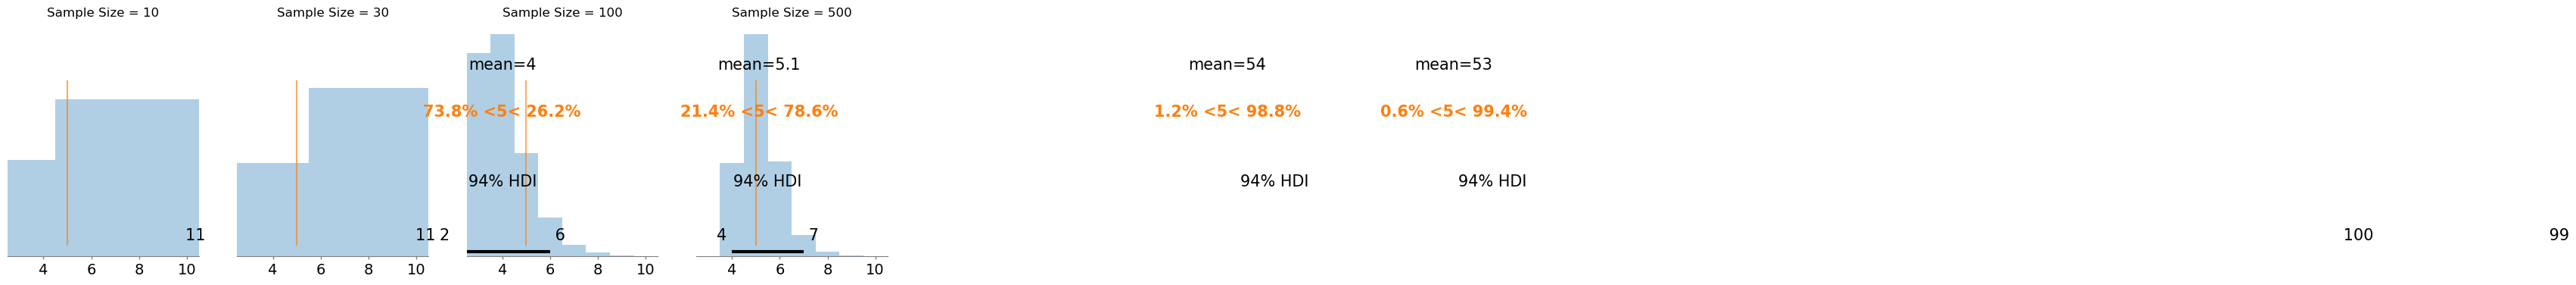

In [29]:
###Q2:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# different sample size
sample_sizes = [10, 30, 100, 500]

# true value
true_theta = 0
true_sigma2 = 1
true_nu = 5 

inference_results = {}

for n in sample_sizes:
    np.random.seed(42)
    x = np.random.standard_t(df=true_nu, size=n) * np.sqrt(true_sigma2) + true_theta  # 生成 t 分布数据

    with pm.Model() as model:
        nu = pm.DiscreteUniform("nu", lower=1, upper=100)

        likelihood = pm.StudentT("x_obs", nu=nu, mu=true_theta, sigma=np.sqrt(true_sigma2), observed=x)

        with model:
            step = pm.Metropolis(vars=[nu]) 
            idata = pm.sample(2000, tune=1000, step=step, return_inferencedata=True, random_seed=42)

        inference_results[n] = idata

        print (az.summary(idata, var_names=["nu"]))

fig, axes = plt.subplots(1, len(sample_sizes), figsize=(15, 4), sharex=True)

for i, n in enumerate(sample_sizes):
    az.plot_posterior(inference_results[n], var_names=["nu"], ref_val=true_nu, ax=axes[i])
    axes[i].set_title(f"Sample Size = {n}")

plt.tight_layout()
plt.show()

In [ ]:
# For Q2 findings:

# Based on the summary, we found that the standard
# deviation decreased when the sample size increased. Moreover, 
# the range of the CI is getting smaller. All these actions show that 
# when the sample size increases, the v is estimated more accurately.

# On the other hand, the r_hat in different sample sizes are 1 -> ess tail
